In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import ukf_voss

In [2]:
nature = ukf_voss.FNNature(ll=800, dT=0.2, dt=0.02)

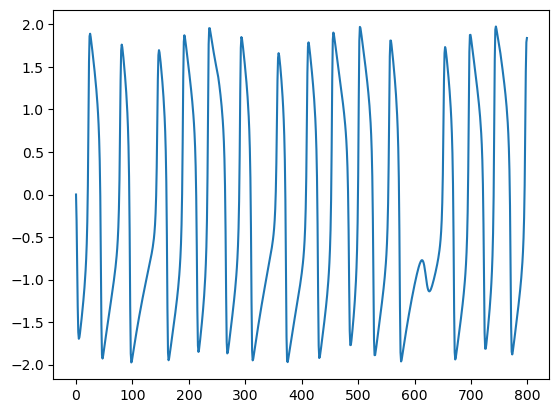

In [6]:
plt.plot(nature.x0[0, :])

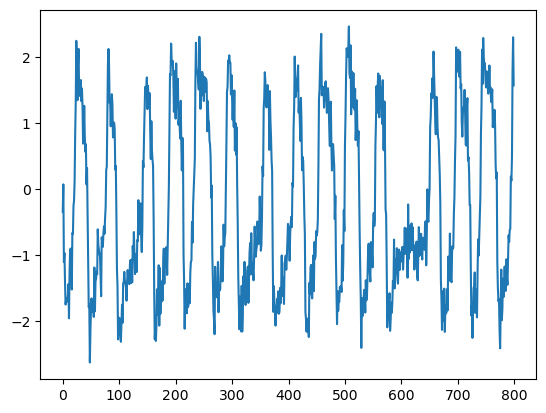

In [11]:
plt.plot(nature.y[0,:])

In [8]:
# define the model
Q_var0 = np.diag((nature.R, nature.R))
fn_model = ukf_voss.FNModel(Q_var=Q_var0, R=nature.R)

In [10]:
uk_filter = ukf_voss.UKFVoss(model=fn_model)

In [12]:
x_hat0, Pxx0, Ks0, errors0 = uk_filter.filter(nature.y)

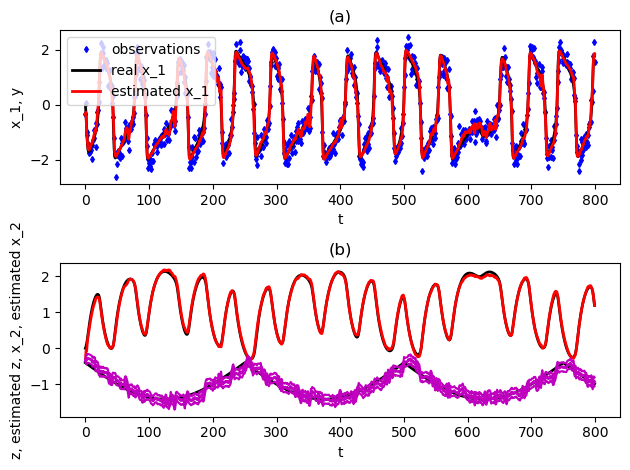

In [13]:
plt.figure()
dq=1
plt.subplot(2, 1, 1)
plt.plot(nature.y.ravel(), 'bd', markeredgecolor='blue', markerfacecolor='blue', markersize=3)
plt.plot(nature.x0[0, :], color='black', linewidth=2)
plt.plot(x_hat0[dq + 0, :], 'r', linewidth=2)
plt.xlabel('t')
plt.ylabel('x_1, y')
plt.title('(a)')
plt.legend(('observations', 'real x_1', 'estimated x_1'))
plt.subplot(2, 1, 2)
plt.plot(nature.x0[1, :], color='black', linewidth=2)
plt.plot(x_hat0[dq + 1, :], 'r', linewidth=2)
plt.plot(nature.p[0, :], color='black', linewidth=2)
for i in range(dq):
    plt.plot(x_hat0[i, :], 'm', linewidth=2)
for i in range(dq):
    plt.plot(x_hat0[i, :] + errors0[i, :], 'm')
for i in range(dq):
    plt.plot(x_hat0[i, :] - errors0[i, :], 'm')
    
plt.xlabel('t')
plt.ylabel('z, estimated z, x_2, estimated x_2')
plt.title('(b)')


plt.tight_layout()